 *1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.

**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
np.random.seed(42)
data=pd.DataFrame({
    'size':np.random.randint(1000,5000,100),
    'bed room':np.random.randint(1,5,100),
    'age':np.random.randint(1,500,100),
    'price':np.random.randint(100000,500000,100),
})
data

,size,bed room,age,price
0,4174,2,352,413003
1,4507,2,231,225657
2,1860,4,241,335167
3,2294,2,52,257381
4,2130,2,96,294806
...,...,...,...,...
95,2129,2,385,212296
96,4843,4,403,194179
97,4893,1,126,190272
98,2500,3,130,138467


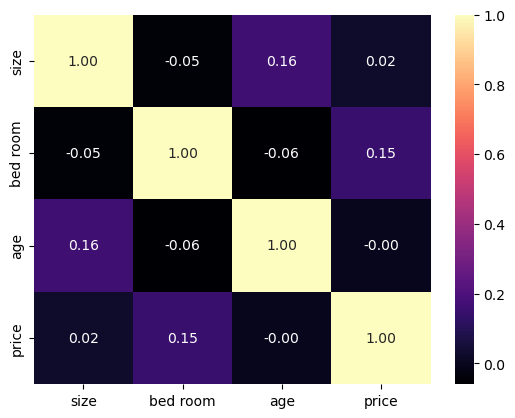

In [6]:
sns.heatmap(data.corr(),annot=True,cmap='magma',fmt='.2f')
plt.title("future corelational matrix")
plt.show()

In [8]:
x=data.drop(columns=['price'])
y=data['price']

model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
x_selected=rfe.fit_transform(x,y)

print("selected Feature using RFE:",x.columns[rfe.support_])
#apply RFE(wrapper method to select top 2 important features)

selected Feature using RFE: Index(['size', 'age'], dtype='object')


In [10]:
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)
importance =np.abs(lasso.coef_)

selected_features=x.columns[importance>0]
print("Selectedfeature using lasso:",selected_features)
#apply lasso to eliminate irelevant features

Selectedfeature using lasso: Index(['size', 'bed room', 'age'], dtype='object')
